<h1 style="color:DodgerBlue">Обзор базовых принципов и паттернов</h1>

<h2 style="color:DodgerBlue">Принципы SOLID</h2>

Принципы SOLID являются фундаментальными концепциями в объектно-ориентированном программировании, которые помогают создавать более модульные, гибкие и поддерживаемые системы. 

Термин "SOLID" представляет собой акроним для набора практик проектирования программного кода и построения гибкой и адаптивной программы. Данный термин был введен известным американским специалистом в области программирования Робертом Мартином (Robert Martin), более известным как "дядюшка Боб" или Uncle Bob.

Сам акроним образован по первым буквам названий SOLID-принципов:

* Single Responsibility Principle (Принцип единственной обязанности)

* Open/Closed Principle (Принцип открытости/закрытости)

* Liskov Substitution Principle (Принцип подстановки Лисков)

* Interface Segregation Principle (Принцип разделения интерфейсов)

* Dependency Inversion Principle (Принцип инверсии зависимостей)

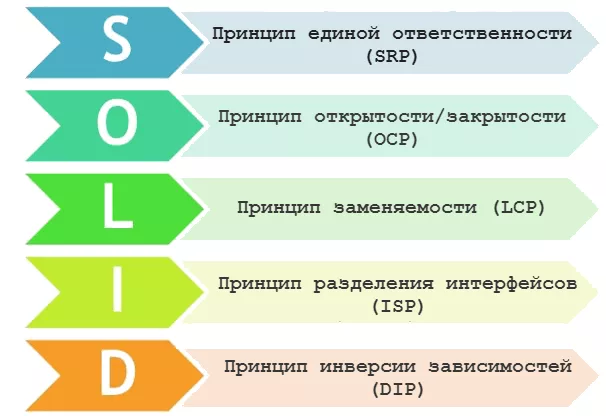

Принципы SOLID - это не паттерны, их нельзя назвать какими-то определенными догмами, которые надо обязательно применять при разработке, однако их использование позволит улучшить код программы, упростить возможные его изменения и поддержку.

<h3 style="color:DodgerBlue">Принцип единственной обязанности (Single Responsibility Principle, SRP)</h3>

Принцип единственной обязанности (Single Responsibility Principle, SRP) является одним из ключевых принципов SOLID в объектно-ориентированном программировании. Этот принцип гласит, что класс должен иметь только одну причину для изменения, то есть класс должен выполнять только одну задачу. Это помогает сделать систему более понятной, гибкой и легкой для тестирования и поддержки.

Давайте рассмотрим, как можно применить этот принцип к классам `Vehicle` и `Car` на языке C#.

### Исходная ситуация

Предположим, у нас есть базовый класс `Vehicle`, который описывает общие характеристики и поведение транспортного средства, и класс `Car`, который наследуется от `Vehicle` и добавляет специфичное для автомобилей поведение.

```csharp
public class Vehicle
{
    public virtual void Move() 
    {
        Console.WriteLine("Транспорт движется...");
    }
}

public class Car : Vehicle
{
    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

В данном случае, класс `Car` несет две обязанности: движение и сигнализация. Это нарушает принцип единственной обязанности, поскольку класс `Car` должен был бы заниматься только тем, что относится к его специфике как автомобиль.

### Решение

Чтобы исправить это нарушение, мы можем разделить эти обязанности на разные классы или интерфейсы. Например, мы можем создать интерфейс `ISignalizable`, который будет содержать метод `Honk()`:

```csharp
public interface ISignalizable
{
    void Honk();
}
```

Теперь класс `Car` может реализовать этот интерфейс, отделив обязанность по сигнализации от основного поведения автомобиля:

```csharp
public class Car : Vehicle, ISignalizable
{
    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

Таким образом, класс `Car` теперь имеет только одну причину для изменения — это его специфика как автомобиля, включая движение и возможность издавать звук сигнала. Все остальные аспекты, такие как сигнализация, отделены в отдельный интерфейс `ISignalizable`, что соответствует принципу единственной обязанности.

### Вывод

Применение принципа единственной обязанности позволяет улучшить структуру кода, делая его более чистым, понятным и легким для поддержки. Каждый класс или интерфейс выполняет свою уникальную роль, что упрощает тестирование, расширение функционала и управление зависимостями в системе.


<h3 style="color:DodgerBlue">Принцип открытости/закрытости (Open/Closed Principle, OCP)</h3>

Принцип открытости/закрытости (Open/Closed Principle, OCP) — один из основных принципов SOLID, который гласит, что программные сущности (классы, модули, функции и т.д.) должны быть открыты для расширения, но закрыты для модификации. Это означает, что вы должны быть в состоянии добавлять новую функциональность без изменения существующего кода.

Давайте рассмотрим, как можно применить этот принцип к классам `Vehicle` и `Car` на языке C#.

### Исходная ситуация

Предположим, у нас есть базовый класс `Vehicle`, который описывает общие характеристики и поведение транспортного средства, и класс `Car`, который наследуется от `Vehicle` и добавляет специфичное для автомобилей поведение.

```csharp
public class Vehicle
{
    public virtual void Move() 
    {
        Console.WriteLine("Транспорт движется...");
    }
}

public class Car : Vehicle
{
    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

На первый взгляд, кажется, что класс `Car` уже следует принципу открытости/закрытости, так как мы можем легко добавить новые функции, просто расширив его. Однако, если бы нам пришлось изменить поведение метода `Move` в классе `Vehicle`, мы бы также пришлось изменить его в классе `Car`, что противоречит принципу.

### Решение

Для соблюдения принципа открытости/закрытости, мы можем использовать абстракцию и полиморфизм. Вместо того чтобы наследоваться от `Vehicle` напрямую, класс `Car` может реализовывать интерфейс, который определяет необходимое поведение. Таким образом, если нам нужно изменить поведение, мы можем просто изменить реализацию интерфейса, не затрагивая подклассы.

Сначала определим интерфейс `IMovable`:

```csharp
public interface IMovable
{
    void Move();
}
```

Теперь класс `Vehicle` и `Car` могут реализовывать этот интерфейс:

```csharp
public class Vehicle : IMovable
{
    public void Move() 
    {
        Console.WriteLine("Транспорт движется...");
    }
}

public class Car : IMovable
{
    public void Move() 
    {
        Console.WriteLine("Автомобиль движется...");
    }

    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

Если нам нужно изменить поведение движения для всех транспортных средств, мы можем просто изменить реализацию метода `Move` в интерфейсе `IMovable`, не затрагивая ни одного из классов, реализующих этот интерфейс. Это позволяет нам расширять функциональность без необходимости изменения существующего кода, следуя принципу открытости/закрытости.

### Вывод

Применение принципа открытости/закрытости позволяет делать ваш код более гибким и устойчивым к изменениям. Это особенно важно в больших и сложных системах, где изменения в одной части могут иметь непредвиденные последствия для других частей.

<h3 style="color:DodgerBlue">Принцип Liskov Substitution Principle (Принцип подстановки Лисков) </h3>

Принцип подстановки Барбары Лисков (Liskov Substitution Principle, LSP) — еще один ключевой принцип SOLID, который гласит, что объекты в программе должны быть заменяемыми на экземпляры их подтипов без изменения корректности программы. Другими словами, подтипы должны быть полностью взаимозаменяемы с их базовыми типами.

Давайте рассмотрим, как можно применить этот принцип к классам `Vehicle` и `Car` на языке C#.

### Исходная ситуация

Предположим, у нас есть базовый класс `Vehicle`, который описывает общие характеристики и поведение транспортного средства, и класс `Car`, который наследуется от `Vehicle` и добавляет специфичное для автомобилей поведение.

```csharp
public class Vehicle
{
    public virtual void Move() 
    {
        Console.WriteLine("Транспорт движется...");
    }
}

public class Car : Vehicle
{
    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

В этом примере класс `Car` является подтипом класса `Vehicle` и может быть использован там, где ожидается объект `Vehicle`. Это соответствует принципу подстановки Лисков, так как `Car` может быть заменен на `Vehicle` без нарушения работы программы.

### Пример нарушения LSP

Допустим, мы хотим добавить новый класс `Boat`, который также наследуется от `Vehicle`, но имеет свое уникальное поведение:

```csharp
public class Boat : Vehicle
{
    public void Sail() 
    {
        Console.WriteLine("Лодка плывет");
    }
}
```

Если мы попытаемся использовать объект `Boat` там, где ожидается объект `Vehicle`, и вызвать метод `Move()`, мы получим результат, отличный от того, что мы ожидали. Например, если у нас есть метод, который выводит информацию о движении транспортного средства:

```csharp
public void DisplayMovementInfo(Vehicle vehicle)
{
    vehicle.Move();
}
```

Использование объекта `Boat` вместо `Vehicle` приведет к выводу сообщения, которое не соответствует нашему ожиданию, так как `Boat` не предназначен для движения по суше.

### Решение

Чтобы исправить это нарушение, мы можем разделить общее поведение на несколько интерфейсов, которые будут реализованы различными классами в зависимости от их специфики. Например, мы можем создать интерфейс `ILandTransport` для наземных транспортных средств и `ISeaTransport` для водных:

```csharp
public interface ILandTransport
{
    void Move();
}

public interface ISeaTransport
{
    void Sail();
}

public class Car : ILandTransport
{
    public void Move() 
    {
        Console.WriteLine("Автомобиль движется...");
    }

    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}

public class Boat : ISeaTransport
{
    public void Sail() 
    {
        Console.WriteLine("Лодка плывет");
    }
}
```

Теперь каждый класс реализует только те интерфейсы, которые соответствуют его функциональности, и мы можем безопасно использовать их в различных контекстах, не нарушая принцип подстановки Лисков.

### Вывод

Применение принципа подстановки Лисков позволяет создавать более надежные и гибкие системы, где подтипы могут быть заменены их базовыми типами без потери корректности работы программы. Это особенно важно в больших и сложных системах, где изменение в одном месте может иметь далеко идущие последствия.


<h3 style="color:DodgerBlue">Принцип разделения интерфейсов (Interface Segregation Principle, ISP)</h3>
Принцип разделения интерфейсов (Interface Segregation Principle, ISP) — еще один ключевой принцип SOLID, который гласит, что клиенты не должны быть вынуждены зависеть от интерфейсов, которые они не используют. Другими словами, большие интерфейсы следует разбивать на более маленькие и конкретные, чтобы клиенты могли выбирать только те интерфейсы, которые действительно им нужны.

Давайте рассмотрим, как можно применить этот принцип к классам `Vehicle` и `Car` на языке C#.

### Исходная ситуация

Предположим, у нас есть интерфейс `IVehicle`, который определяет все возможные действия, которые может выполнить транспортное средство:

```csharp
public interface IVehicle
{
    void Move();
    void Honk();
    void Sail(); // Не все транспортные средства могут плыть
    void Fly(); // Еще меньше транспортных средств могут летать
}
```

Класс `Car` реализует этот интерфейс, хотя некоторые из методов (`Sail` и `Fly`) не применимы к автомобилю:

```csharp
public class Car : IVehicle
{
    public void Move() 
    {
        Console.WriteLine("Автомобиль движется...");
    }

    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }

    public void Sail() 
    {
        // Не применимо к автомобилю
    }

    public void Fly() 
    {
        // Также не применимо к автомобилю
    }
}
```

Это нарушает принцип разделения интерфейсов, так как класс `Car` зависит от интерфейса, который включает методы, не используемые этим классом.

### Решение

Чтобы исправить это нарушение, мы можем разделить интерфейс `IVehicle` на более мелкие и конкретные интерфейсы, которые лучше соответствуют различным категориям транспортных средств:

```csharp
public interface IVehicle
{
    void Move();
}

public interface ICanHonk
{
    void Honk();
}

public interface ICanSail
{
    void Sail();
}

public interface ICanFly
{
    void Fly();
}
```

Теперь класс `Car` может реализовывать только те интерфейсы, которые ему действительно нужны:

```csharp
public class Car : IVehicle, ICanHonk
{
    public void Move() 
    {
        Console.WriteLine("Автомобиль движется...");
    }

    public void Honk() 
    {
        Console.WriteLine("Автомобиль гудит...");
    }
}
```

Класс `Boat` может реализовывать другие интерфейсы, которые подходят для его функциональности:

```csharp
public class Boat : IVehicle, ICanSail
{
    public void Move() 
    {
        Console.WriteLine("Лодка движется...");
    }

    public void Sail() 
    {
        Console.WriteLine("Лодка плывет...");
    }
}
```

### Вывод

Применение принципа разделения интерфейсов позволяет создавать более гибкую и удобную для использования систему, где каждый клиент может выбирать только те интерфейсы, которые ему действительно нужны. Это уменьшает ненужную зависимость и упрощает поддержку и расширение системы.


<h3 style="color:DodgerBlue">Принцип инверсии зависимостей (Dependency Inversion Principle, DIP)</h3>

Принцип инверсии зависимостей (Dependency Inversion Principle, DIP) является одним из пяти основных принципов SOLID в объектно-ориентированном программировании и проектировании. Этот принцип направлен на уменьшение прямых зависимостей между модулями системы путем использования абстракций. В контексте DIP, модули высокого уровня (те, которые выполняют основную бизнес-логику) не должны зависеть от модулей низкого уровня (техническая реализация). Вместо этого оба типа модулей должны зависеть от абстракций. Кроме того, абстракции не должны зависеть от деталей, а детали должны зависеть от абстракций.

Давайте рассмотрим пример с классами `Vehicle` и `Car`, чтобы лучше понять применение принципа инверсии зависимостей на языке C#.

### Исходная ситуация

Предположим, у нас есть система, в которой классы транспортных средств напрямую взаимодействуют с конкретными типами двигателей. Например, класс `Car` может иметь зависимость от класса `PetrolEngine`.

```csharp
public class PetrolEngine
{
    public void Start()
    {
        Console.WriteLine("Запустился бензиновый двигатель...");
    }
}

public class Car
{
    private PetrolEngine _engine;

    public Car()
    {
        _engine = new PetrolEngine();
    }

    public void StartEngine()
    {
        _engine.Start();
    }
}
```

В этом примере класс `Car` напрямую зависит от класса `PetrolEngine`, что нарушает принцип инверсии зависимостей.

### Применение DIP

Чтобы применить принцип инверсии зависимостей, мы можем ввести абстракцию для двигателя и изменить класс `Car`, чтобы он использовал эту абстракцию вместо прямой зависимости от `PetrolEngine`.

```csharp
// Абстракция для двигателя
public interface IEngine
{
    void Start();
}

// Конкретная реализация двигателя
public class PetrolEngine : IEngine
{
    public void Start()
    {
        Console.WriteLine("Запустился бензиновый двигатель...");
    }
}

// Класс Car теперь зависит от абстракции IEngine
public class Car
{
    private IEngine _engine;

    // Зависимость внедряется через конструктор
    public Car(IEngine engine)
    {
        _engine = engine;
    }

    public void StartEngine()
    {
        _engine.Start();
    }
}
```

Теперь класс `Car` зависит только от абстракции `IEngine`, а не от конкретной реализации `PetrolEngine`. Это позволяет легко заменять типы двигателей без изменения кода класса `Car`. Например, если мы хотим использовать электрический двигатель вместо бензинового, мы просто создаем класс `ElectricEngine`, реализующий интерфейс `IEngine`, и передаем его экземпляр в конструктор `Car`.

### Вывод

Применение принципа инверсии зависимостей позволяет сделать систему более гибкой и легко расширяемой. Зависимость от абстракций вместо конкретных реализаций уменьшает связность между компонентами системы и облегчает тестирование, поскольку мы можем легко заменять реальные зависимости на мок-объекты в тестах.


<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип  Single Responsibility Principle (Принцип единственной обязанности) на базе класса Animal

In [9]:
public class Animal 
{
    private string name;        
    private string species; 
    public string Name
    {
        get { return name; }
        set { name = value; }  
    }
    public string Species
    {
        get { return species; }
        set { species = value; }  
    }
    public void Walk() 
    {
        Console.WriteLine($"{Name} гуляет");
    }

}
public class InfoAnimal 
{
    public void Info(Animal animal) 
    {
        Console.WriteLine($"Животное: {animal.Species}; Кличка: {animal.Name}");
    }
}

Animal myAnimal = new Animal();
InfoAnimal info= new InfoAnimal();

myAnimal.Species = "Собака";
myAnimal.Name = "Тайга";

info.Info(myAnimal);
myAnimal.Walk();

Животное: Собака; Кличка: Тайга
Тайга гуляет


<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип  Open/Closed Principle (Принцип открытости/закрытости) на базе класса Animal

In [17]:
public abstract class Animal
{
    private string name;        
    private string species; 
    public string Name
    {
        get { return name; }
        set { name = value; }  
    }
    public string Species
    {
        get { return species; }
        set { species = value; }  
    }
    public abstract void Walk();
}
public class InfoAnimal
{
    public void Info(Animal animal) 
    {
        Console.WriteLine($"Животное: {animal.Species}; Кличка: {animal.Name}");
    }
}
public class Bird : Animal
{
    public override void Walk()
    {
        Console.WriteLine($"{Name} летает в небе");
    }
}
public class Dog : Animal
{
    public override void Walk()
    {
        Console.WriteLine($"{Name} ходит по земле");
    }
}

Animal myBird = new Bird();
myBird.Species = "Птица";
myBird.Name = "Сати";
Animal myDog = new Dog();
myDog.Name = "Тайга";
myDog.Species = "Собака";
InfoAnimal info = new InfoAnimal();

info.Info(myBird);
myBird.Walk();
info.Info(myDog);
myDog.Walk();

Животное: Птица; Кличка: Сати
Сати летает в небе
Животное: Собака; Кличка: Тайга
Тайга ходит по земле


<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип Liskov Substitution Principle (Принцип подстановки Лисков) на базе класса Animal

In [24]:

public abstract class Animal
{
    private string name;        
    private string species; 
    public string Name
    {
        get { return name; }
        set { name = value; }  
    }
    public string Species
    {
        get { return species; }
        set { species = value; }  
    }
    public abstract void Walk();
}
public class AnimalInfo
{
    public void Info(Animal animal) 
    {
        Console.WriteLine($"Животное: {animal.Species}; Кличка: {animal.Name}");
    }
}
public interface ICanMakeSound
{
    void MakeSound();
}
public class Dog : Animal, ICanMakeSound
{
    public override void Walk()
    {
        Console.WriteLine($"{Name} ходит по земле");
    }
    public void MakeSound()
    {
        Console.WriteLine($"{Name} лает");
    }
}
public class Fish : Animal
{
    public override void Walk()
    {
        Console.WriteLine($"{Name} плавает в аквариуме");
    }
}

Animal myDog = new Dog();
myDog.Species = "Собака";
myDog.Name = "Тайга";
Animal myFish = new Fish();
myFish.Name = "Карась";
myFish.Species = "Рыба";
AnimalInfo info = new AnimalInfo();

info.Info(myFish);
myFish.Walk();
info.Info(myDog);
myDog.Walk();
if (myDog is ICanMakeSound soundMaker) soundMaker.MakeSound();

Животное: Рыба; Кличка: Карась
Карась плавает в аквариуме
Животное: Собака; Кличка: Тайга
Тайга ходит по земле
Тайга лает


<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип Interface Segregation Principle (Принцип разделения интерфейсов) на базе класса Animal

In [31]:
public interface IAnimal
{
    string Name{ get; set; }
    string Species { get; set; }
    void Walk();
}
public interface ICanRun
{
    void Run();
}
public interface ICanFly
{
    void Fly();
}
public class Dog : IAnimal, ICanRun
{
    private string name;
    private string species;
    public string Name
    {
        get { return name; }
        set { name = value; }  
    }
    public string Species
    {
        get { return species; }
        set { species = value; }  
    }
    public void Walk()
    {
        Console.WriteLine($"{Name} двигается");
    }
    public void Run()
    {
        Console.WriteLine($"{Name} ходит по земле");
    }
}
public class Bird : IAnimal, ICanFly, ICanRun
{
    private string name;
    private string species;
    public string Name
    {
        get { return name; }
        set { name = value; }  
    }
    public string Species
    {
        get { return species; }
        set { species = value; }  
    }
    public void Walk()
    {
        Console.WriteLine($"{Name} двигается");
    }
    public void Fly()
    {
        Console.WriteLine($"{Name} летает в небе");
    }
    public void Run()
    {
        Console.WriteLine($"{Name} ходит по земле");
    }
}
IAnimal myDog = new Dog();
myDog.Name = "Тайга";
myDog.Species = "Собака";

IAnimal myBird = new Bird();
myBird.Name = "Сати";
myBird.Species = "Птица";

IAnimal[] animals = { myDog, myBird };

foreach (var animal in animals)
{
    Console.WriteLine($"Животное: {animal.Species}, Имя: {animal.Name}");
    if (animal is ICanFly flyer) flyer.Fly();
    if (animal is ICanRun runner) runner.Run();
}

Животное: Собака, Имя: Тайга
Тайга ходит по земле
Животное: Птица, Имя: Сати
Сати летает в небе
Сати ходит по земле


<h4 style="color:Red">Задание:</h4>

----

Ниже в блоке реализуйте принцип  Dependency Inversion Principle (Принцип инверсии зависимостей) на базе класса Animal

In [35]:
public interface IAnimal
{
    string Name{ get; set; }
    string Species { get; set; }
    void MakeSound();
}
public class Dog : IAnimal
{
    private string name;
    private string species;
    public string Name
    {
        get { return name; }
        set { name = value; }  
    }
    public string Species
    {
        get { return species; }
        set { species = value; }  
    }
    public void MakeSound()
    {
        Console.WriteLine($"{Name} лает");
    }
}
public class Bird : IAnimal
{
    private string name;
    private string species;
    public string Name
    {
        get { return name; }
        set { name = value; }  
    }
    public string Species
    {
        get { return species; }
        set { species = value; }  
    }
    public void MakeSound()
    {
        Console.WriteLine($"{Name} чирикает");
    }
}
public class AnimalTame
{
    private IAnimal _animal;
    public AnimalTame(IAnimal animal)
    {
        _animal = animal;
    }
    public void Tame()
    {
        Console.WriteLine($"Животное: {_animal.Species}; Кличка: {_animal.Name} - приручено");
        _animal.MakeSound();
    }
}
IAnimal myDog = new Dog();
myDog.Name = "Тайга";
myDog.Species = "Собака";

IAnimal myBird = new Bird();
myBird.Name = "Сати";
myBird.Species = "Птица";

AnimalTame taming_1 = new AnimalTame(myDog);
taming_1.Tame();

AnimalTame taming_2 = new AnimalTame(myBird);
taming_2.Tame();

Животное: Собака; Кличка: Тайга - приручено
Тайга лает
Животное: Птица; Кличка: Сати - приручено
Сати чирикает
